In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Housing Data

In [2]:
df = pd.read_csv(f"./house_data/kc_house_data.csv")
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

# Exploring the data 

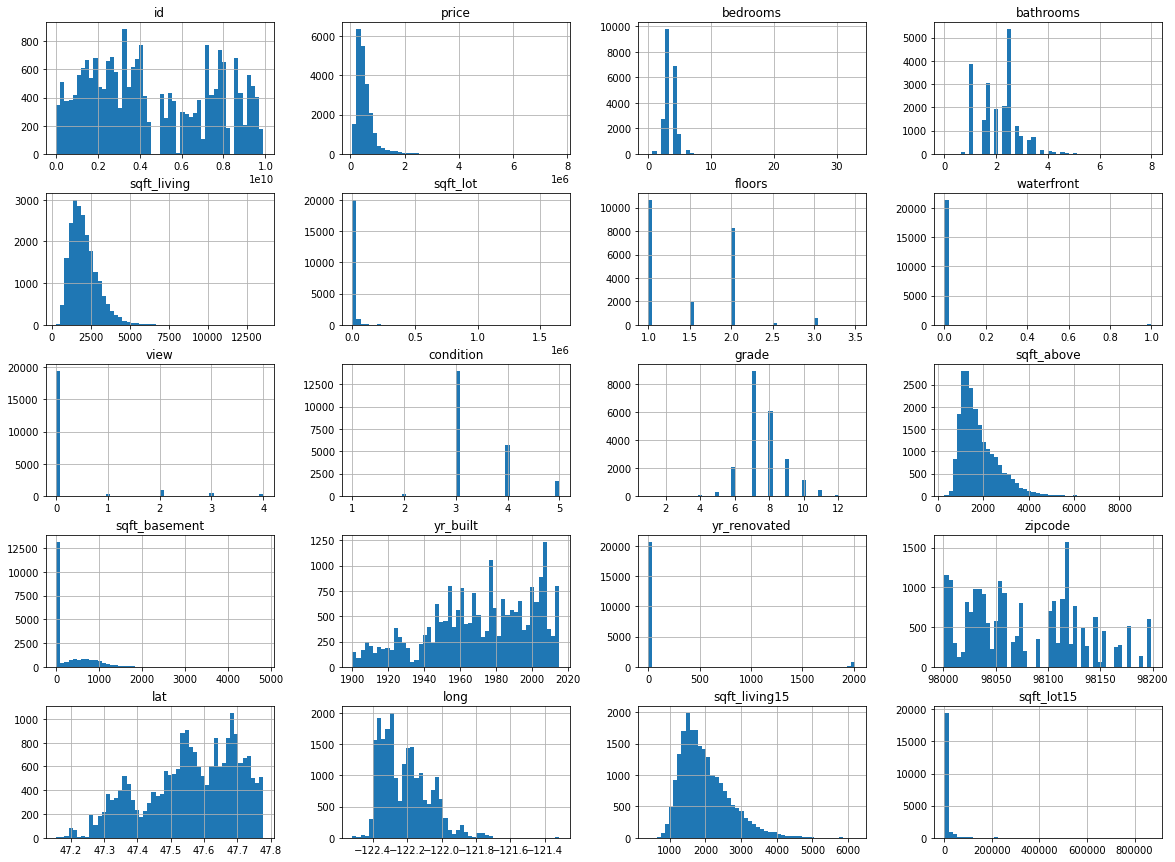

In [3]:
#turicreate.show(sales["CrimeRate"], sales["HousePrice"])
#plt.scatter(philly['CrimeRate'], philly['HousePrice'])
df.hist(bins = 50, figsize = (20, 15))
plt.show()

In [4]:
train_df = df.head(17290)
test_df = df.tail(len(df) - len(train_df))
print(train_df.shape)
print(test_df.shape)

(17290, 21)
(4323, 21)


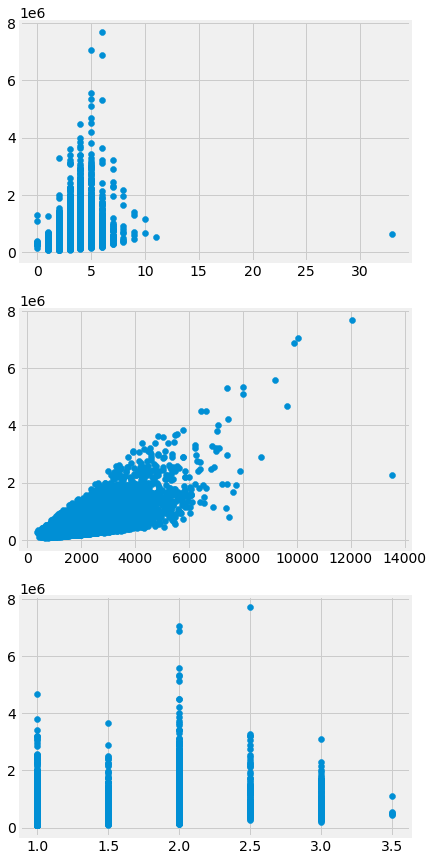

In [5]:
fig = plt.figure(figsize=(7, 15))
plt.style.use('fivethirtyeight')
ax1 = fig.add_subplot(3,1,1)
ax1.scatter(x = train_df['bedrooms'], y= train_df["price"])
ax2 = fig.add_subplot(3,1,2)
ax2.scatter(x = train_df['sqft_living'], y= train_df["price"])
ax3 = fig.add_subplot(3,1,3)
ax3.scatter(x = train_df['floors'], y= train_df["price"])
plt.show()

In [6]:
print(train_df[['sqft_living', 'floors', 'bedrooms', 'price']].corr())

             sqft_living    floors  bedrooms     price
sqft_living     1.000000  0.400999  0.562389  0.701429
floors          0.400999  1.000000  0.207103  0.281363
bedrooms        0.562389  0.207103  1.000000  0.301314
price           0.701429  0.281363  0.301314  1.000000


In [7]:
numerical_train = train_df.select_dtypes(include =['int64', 'float64'])
numerical_train = numerical_train.drop(['grade', 'yr_renovated', 'lat', 'long', 'yr_built', 'zipcode',
                        'waterfront', 'view', 'condition'], axis = 1)
null_series = numerical_train.isnull().sum()
full_cols_series = null_series[null_series == 0]
train_subset = train_df[full_cols_series.index]
sorted_corrs = train_subset.corr()['price'].abs().sort_values()

<function matplotlib.pyplot.show(close=None, block=None)>

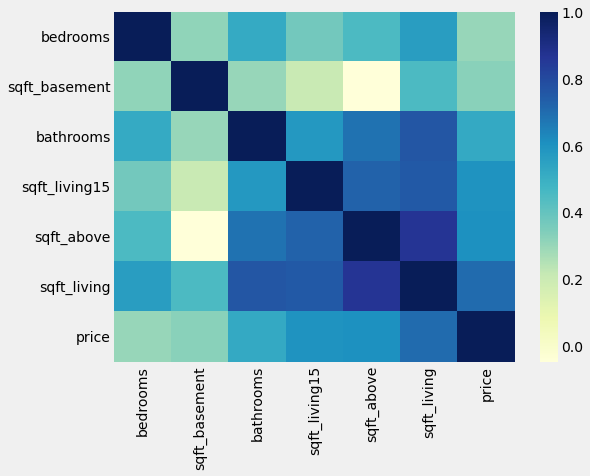

In [8]:
fig = plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = train_subset[strong_corrs.index].corr()
sns.heatmap(corrmat, cmap="YlGnBu")
plt.show

## Fit the regression model

In [9]:
from sklearn.model_selection import train_test_split
feature_list = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above','sqft_basement']
features = df[feature_list]
target = df['price']
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

## Slope and intercept values

In [10]:
print('linear model coeff (w): {}'.format(model.coef_))
print('linear model intercept (b): {:.3f}'.format(model.intercept_))

linear model coeff (w): [-5.63793140e+04 -2.88913805e+03  2.17681534e+02 -2.97086379e-01
  1.77691658e+04  8.77374977e+01  1.29944036e+02]
linear model intercept (b): 67840.577


## Function: Simple linear regression

In [11]:
def simple_linear_regression(input_feature, output):
    features_LR = df[input_feature]
    target_LR = df[output]
    X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(features_LR, target_LR, test_size=0.20, random_state=0)
    model_f = LinearRegression().fit(X_train_f, y_train_f)
    return model_f.intercept_, model_f.coef_

In [13]:
#Check the defined function
input_feature_1 = ['sqft_living']
output_1 = ['price']
intercept_1, coef_1 = simple_linear_regression(input_feature_1, output_1)

In [15]:
print(str(intercept_1) + ' and coeff ' + str(coef_1))

[-48536.69005829] and coeff [[284.14771038]]


## Function: Predictions of LR

In [16]:
def get_regression_predictions(input_feature, intercept, slope):
    predicted_output = input_feature * slope + intercept
    return predicted_output

In [17]:
intercept_val, slope_val = simple_linear_regression(input_feature_1, output_1)
result_pred = get_regression_predictions(2650, intercept_val, slope_val)
print("Price prediction for a house with area 2650 is {}".format(result_pred))

Price prediction for a house with area 2650 is [[704454.74244901]]


## Function: Get RSS value

In [18]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    result_ref = get_regression_predictions(input_feature, intercept, slope)
    rss_value = output - result_ref
    return rss_value

In [21]:
RSS_ans = get_residual_sum_of_squares(2650, 745500, intercept_val, slope_val)
print(RSS_ans)

[[41045.25755099]]


## Function: Inverse value calculation

In [22]:
def inverse_regression_predictions(output, intercept, slope):
    estimated_input = (output - intercept) / slope
    return estimated_input

In [23]:
val_area_800k = inverse_regression_predictions(800000, intercept_1, coef_1)
print("Area prediction for a house with price of $800,000 is {}".format(val_area_800k))

Area prediction for a house with price of $800,000 is [[2986.25207616]]
